# CSOC IG Prerquisites - Part 3

### Header

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
import time

### Body

In [2]:
# Reading CSV File

houses = pd.read_csv(r'./housing.csv')
houses = houses.dropna().reset_index(drop=True)

In [3]:
# Extracting Features & Targets

ocean_dict = {'<1H OCEAN':4, 'INLAND' :5, 'NEAR OCEAN':3,'NEAR BAY':2,'ISLAND':1}
houses.ocean_proximity = houses.ocean_proximity.apply(lambda x: ocean_dict[x])
cols = ['housing_median_age','total_rooms','total_bedrooms','median_income','households','ocean_proximity']

feature = houses[cols]
target = houses.median_house_value

In [4]:
# Defining data for Split training & testing

X_train, x_test, y_train, y_test = train_test_split(feature, target, random_state=1)

In [5]:
# Training model on Linear regression

start = time.time()

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

end = time.time()
time_taken = end-start
print(f"Time taken: {time_taken:.6f} seconds")

Time taken: 0.023732 seconds


In [6]:
# Predicting Output

y_out = lin_model.predict(x_test)

In [7]:
# Combining Output into a dataframe

df_out=pd.DataFrame(y_out, y_test).reset_index()
df_out.columns=['Predicted Value','Actual Value']
x_t = x_test.reset_index(drop=True)
df_out = pd.concat((x_t,df_out), axis=1)
df_out

,housing_median_age,total_rooms,total_bedrooms,median_income,households,ocean_proximity,Predicted Value,Actual Value
0,38.0,3039.0,487.0,7.7116,465.0,4,360900.0,377462.424053
1,38.0,1826.0,300.0,5.2962,297.0,4,291500.0,268815.384629
2,10.0,2050.0,473.0,2.7961,471.0,4,131300.0,136907.451167
3,16.0,5297.0,810.0,6.4522,667.0,3,500001.0,316915.927767
4,15.0,1666.0,351.0,2.9559,316.0,5,118800.0,116043.864377
...,...,...,...,...,...,...,...,...
5104,52.0,1384.0,295.0,2.0242,244.0,5,94600.0,119269.558832
5105,16.0,3182.0,429.0,7.0592,428.0,4,288200.0,309527.611372
5106,17.0,5799.0,921.0,5.0524,843.0,4,285400.0,228714.085471
5107,24.0,2046.0,442.0,2.3182,367.0,3,500001.0,158422.962735


In [8]:
# Generating Performance Metrics

mae = mean_absolute_error(df_out['Actual Value'], df_out['Predicted Value'])
rmse = root_mean_squared_error(df_out['Actual Value'],df_out['Predicted Value'])
r2scr = r2_score(df_out['Actual Value'],df_out['Predicted Value'])

### Comparison & Performance Metrics

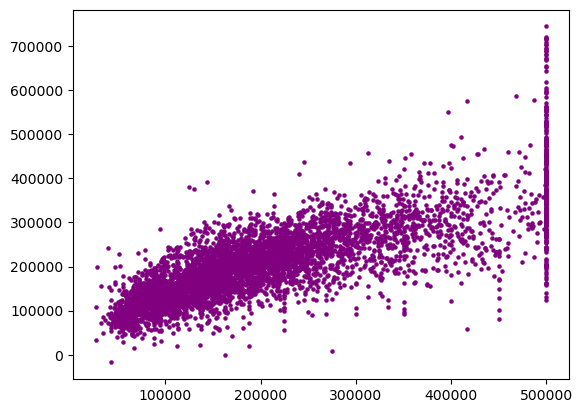

In [9]:
plt.scatter(df_out['Predicted Value'],df_out['Actual Value'], s=5, color='purple');

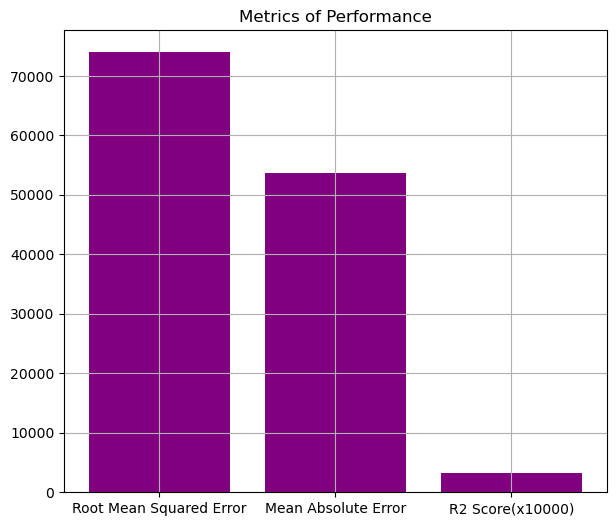

In [10]:
plt.figure(figsize=(7,6))
plt.grid(True)
plt.bar(x=['Root Mean Squared Error','Mean Absolute Error','R2 Score(x10000)'],height=[rmse,mae,r2scr*10000], color = 'purple')
plt.title('Metrics of Performance');

In [11]:
print(f'''Mean Absolute Error : {mae}
Root Mean Squared Eror : {rmse}
R2 Score : {r2scr}
Time Taken for training : {time_taken} seconds''')

Mean Absolute Error : 53754.69052752118
Root Mean Squared Eror : 73980.33757238998
R2 Score : 0.3301331794137583
Time Taken for training : 0.023732423782348633 seconds


### End of Code